In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
# import geopandas as gpd
import numpy as np
import json
from time import time
from geopy.distance import geodesic
from joblib import Parallel, delayed
import pickle as pkl
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib widget
from scipy.spatial import Delaunay
import os
import re

In [30]:
dados = pd.read_csv("ocorrencias.csv")
data = dados[dados.columns[[0,1,5,7,8,13,-2]]]
data.dropna(inplace=True)


In [25]:
data

,precipitação,pressão,temperatura BS,temperatura máxima,temperatura mínima,umidade relativa,ocorrências
0,0.328738,926.829274,21.343436,21.902856,20.824638,80.417703,0
1,0.653937,927.588028,22.102191,22.671177,21.582843,81.032695,0
2,0.232608,928.967187,21.662097,22.281418,21.084451,77.991062,2
3,0.179023,928.730148,19.370256,19.918422,18.844613,79.897890,0
4,0.168718,931.411411,17.129825,17.821827,16.501097,78.626180,0
...,...,...,...,...,...,...,...
1675,0.020269,957.744221,21.634008,22.535216,20.784833,59.856399,0
1676,NaN,955.979493,25.463135,26.370173,24.589534,56.538527,0
1677,NaN,953.986397,25.810334,26.537830,25.114436,68.743915,0
1678,NaN,953.688775,26.374546,27.169581,25.607273,63.941536,0


In [45]:
fatores = data.drop(["ocorrências"],axis=1)
target = data[["ocorrências"]].replace({2:1})

In [46]:
target.value_counts()

ocorrências
0              962
1              298
dtype: int64

#### Ajustes

In [34]:
## biblioteca de modelos
from itertools import product
from logging import raiseExceptions
from sklearn.metrics import roc_auc_score, roc_curve,  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
# from scipy.stats import f_oneway, kruskal, chi2_contingency
# import scikit_posthocs as sp
# from tqdm import tqdm


In [47]:

X_train,X_test,y_train,y_test = train_test_split(fatores,target,test_size=0.3,stratify=target)

In [88]:
model = LogisticRegression(class_weight='balanced',max_iter=100000,C=100)
pipe = Pipeline([('escala',StandardScaler()),('modelo',model)])

In [89]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('escala', StandardScaler()),
                ('modelo',
                 LogisticRegression(C=100, class_weight='balanced',
                                    max_iter=100000))])

In [90]:
y_pred = pipe.predict_proba(X_test)[:,1]

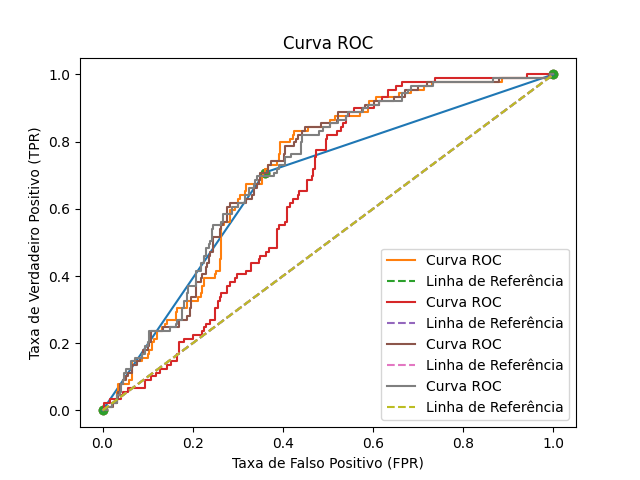

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Linha de Referência')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()